https://www.kaggle.com/datasets/susanta21/top-movies-with-high-ratings

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sashapanasenko/Downloads/diamonds.csv')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Описание переменных:
1) carat: Вес бриллианта, измеряемый в каратах. Этот показатель сильно влияет на цену бриллианта, поскольку более тяжелые камни обычно ценятся выше.
2) cut: Качество огранки бриллианта. Огранка влияет на блеск бриллианта и представлена категориями (например, Ideal, Premium, Good).
3) color: Цвет бриллианта, где буквы ближе к началу алфавита (D, E, F) обозначают более ценные, более бесцветные камни.
4) clarity: Чистота бриллианта, указывающая на количество и видимость включений и дефектов.
5) depth: Общая глубина бриллианта от вершины до кулетки, выраженная в процентах.
6) table: Ширина верхней части бриллианта относительно его наибольшей ширины, также выраженная в процентах.
7) price: Цена бриллианта в долларах США.
8) x, y, z: Физические размеры бриллианта в миллиметрах. Эти измерения представляют собой длину (x), ширину (y) и глубину (z).

In [4]:
print(df.describe())
print(df.isnull().sum())


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [5]:
from sklearn.preprocessing import StandardScaler

# Замена 0 на NaN в размерах
df[['x', 'y', 'z']] = df[['x', 'y', 'z']].replace(0, np.nan)

# Заполнение NaN медианой
for dimension in ['x', 'y', 'z']:
    median_value = df[dimension].median()
    df[dimension].fillna(median_value, inplace=True)

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


Дополнительные колонки, созданные в результате применения функции pd.get_dummies, позволяют преобразовать категориальные переменные в числовые, что необходимо для использования этих данных в большинстве алгоритмов машинного обучения. 

В нашем случае, колонки cut, color, и clarity были преобразованы:

1) cut — качество огранки бриллианта. Исходные категории (например, Ideal, Premium, Good) преобразуются в отдельные столбцы (например, cut_Ideal, cut_Premium, cut_Good). Если бриллиант соответствует категории, то в соответствующем столбце будет значение True, иначе False.
2) color — цвет бриллианта. Преобразуется аналогичным образом. Каждый возможный цвет (D, E, F, и т.д.) получает свой столбец (color_D, color_E, и т.д.).
3) clarity — чистота бриллианта. Каждый уровень чистоты (например, SI1, VS2) также преобразуется в отдельный столбец (clarity_SI1, clarity_VS2, и т.д.).

В таком преобразовании каждая категория признака становится отдельной колонкой, и если объект принадлежит к этой категории, в соответствующем столбце будет стоять 1 (True), а во всех остальных — 0 (False)


/var/folders/j2/5tq6080132nd8cn1pbzm2nxr0000gn/T/ipykernel_32669/3025285341.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


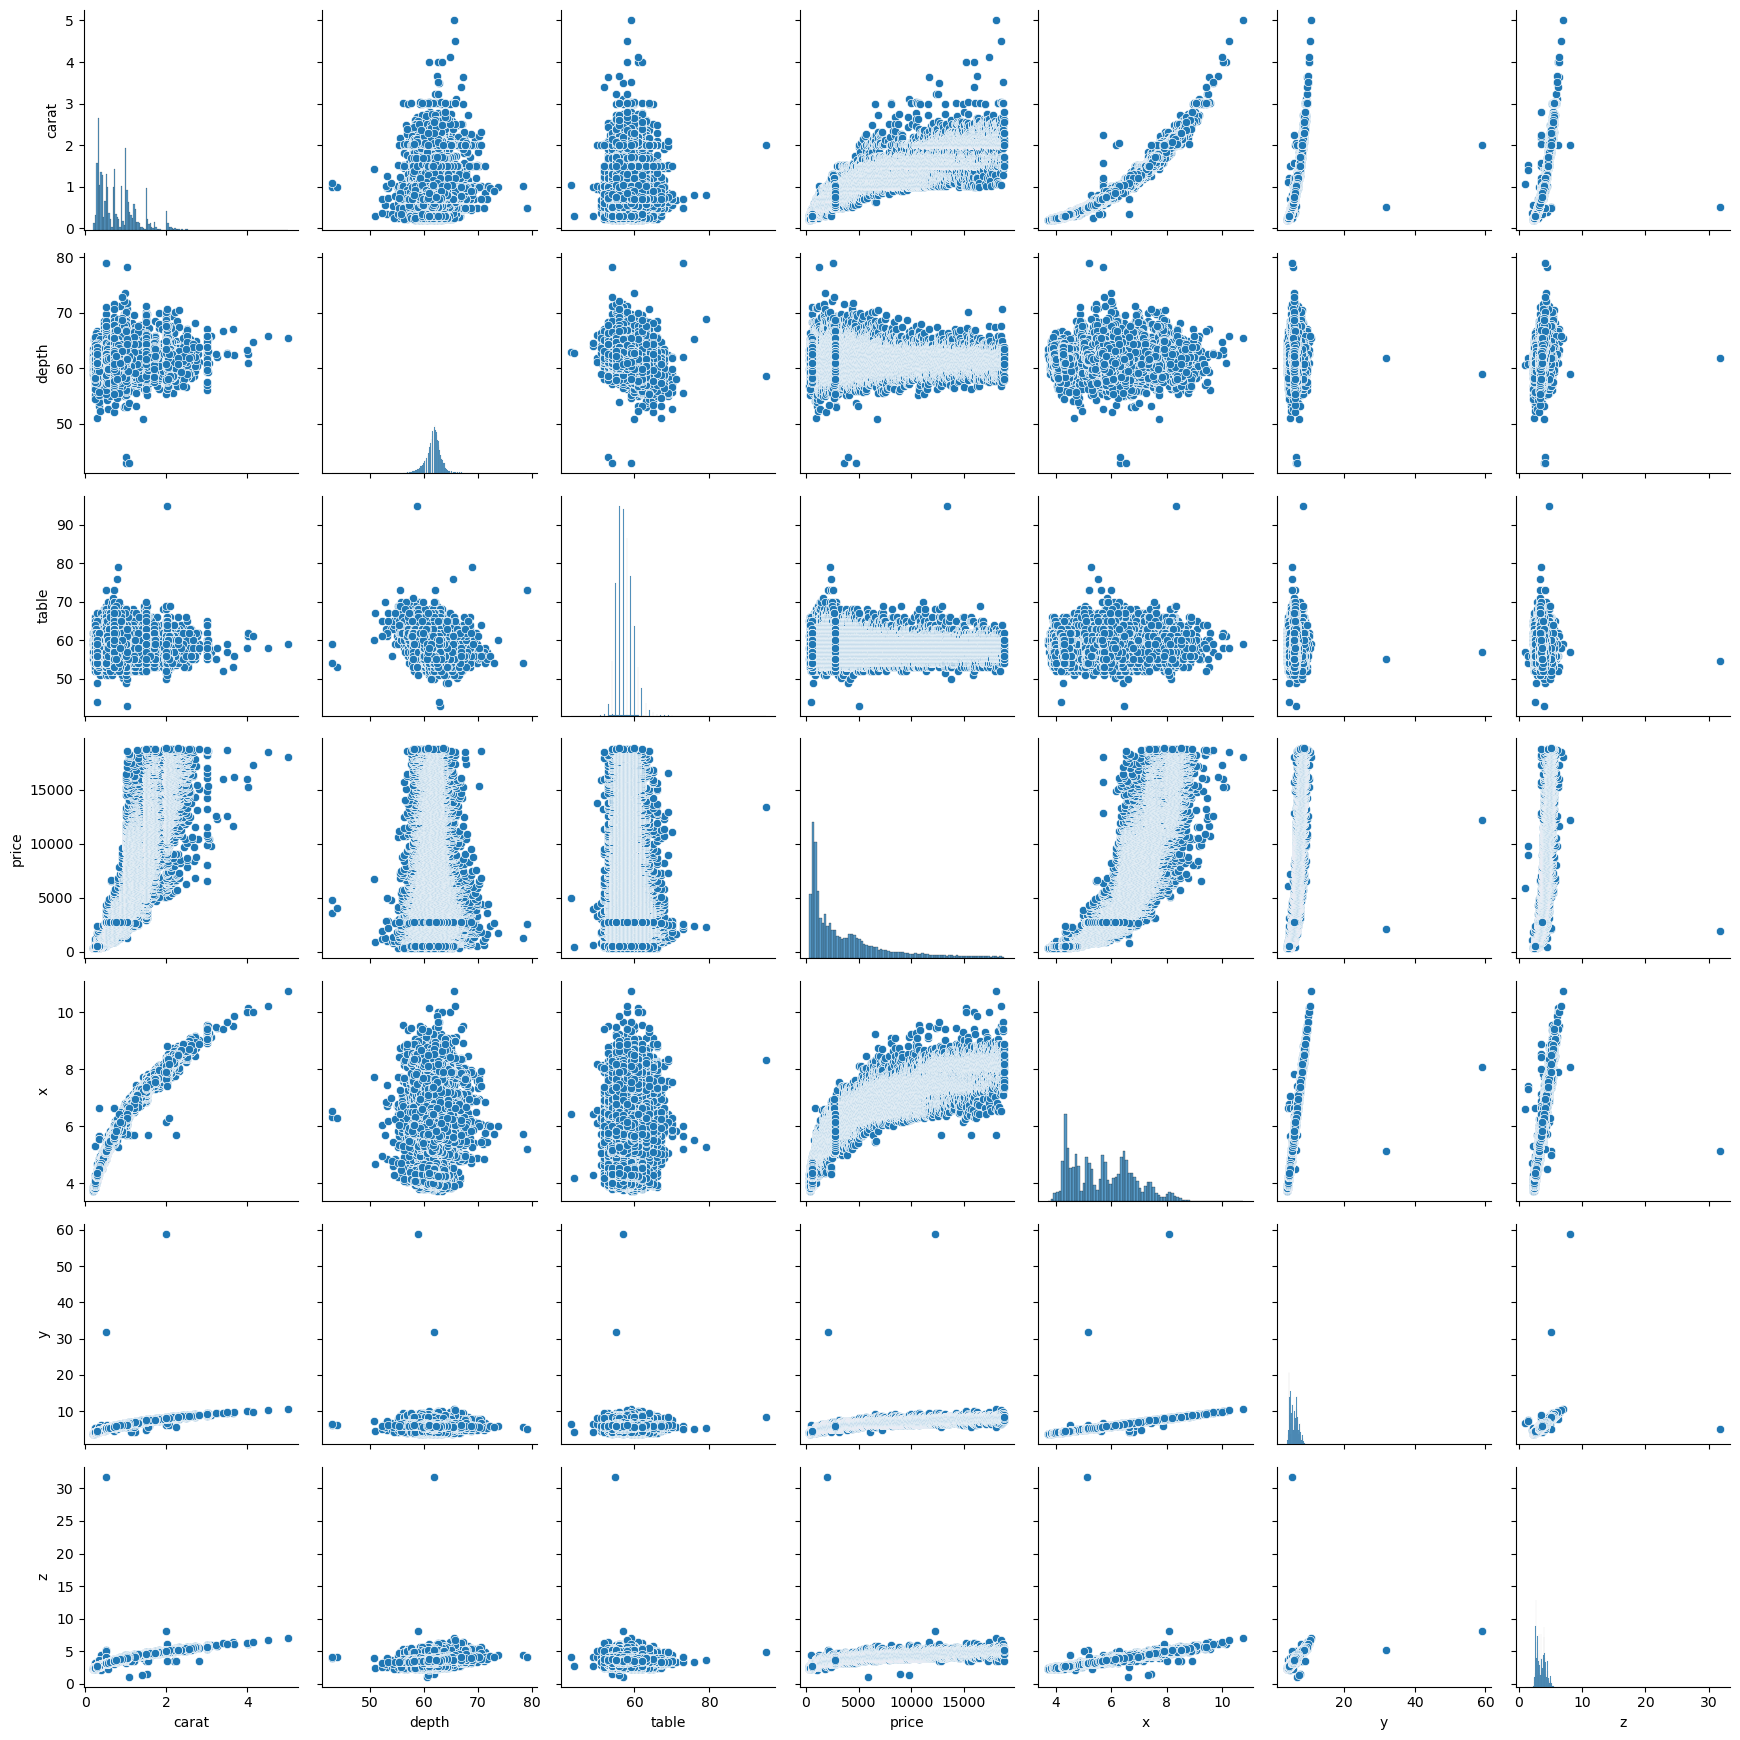

In [8]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')

sns.pairplot(df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
plt.tight_layout()
plt.show()


1) Диагональные графики (гистограммы) показывают распределение каждой переменной. Например, графики для carat, depth, table, price, x, y, z позволяют увидеть распределение значений по каждой из этих переменных. На них видно, какие значения являются наиболее часто встречающимися, и можно заметить такие особенности, как скошенность данных.
2) Внедиагональные графики (точечные диаграммы или scatter plots) иллюстрируют корреляции между парами переменных. Например, между carat и price наблюдается явная положительная корреляция: с увеличением карата увеличивается и цена бриллианта.
3) Из точечных графиков можно также увидеть паттерны и возможные выбросы. Например, в данных по размерам x, y и z видны аномально высокие значения, которые могут указывать на ошибки в данных или на особенно крупные бриллианты.

## ВИЗУАЛИЗАЦИЯ

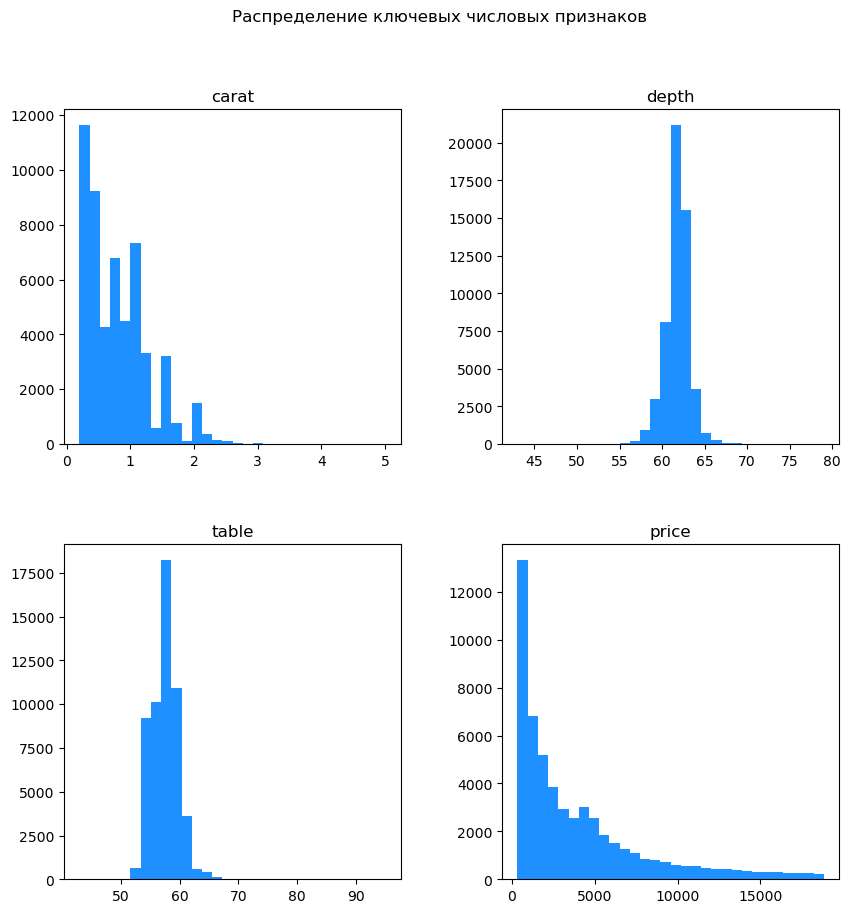

In [9]:
df[['carat', 'depth', 'table', 'price']].hist(bins=30, figsize=(10, 10), grid=False, color='dodgerblue')
plt.suptitle('Распределение ключевых числовых признаков')
plt.show()

#### Распределение ключевых числовых признаков

Мы построили гистограммы для признаков, таких как carat, depth, table, и price, чтобы увидеть их распределения.

1) Распределение каратов (carat):
Большинство бриллиантов имеют вес менее 2 карат.
На гистограмме видны пики, особенно выраженные около 0.3, 0.5, 0.7, и 1 карат. Это указывает на популярные размеры камней, которые чаще всего выбирают потребители.
2) Распределение глубины (depth):
Подавляющее большинство бриллиантов имеют глубину около 60% до 63%, что свидетельствует о стандартизации размеров при огранке.
3) Распределение ширины таблицы (table):
Большинство значений сосредоточено вокруг 55% до 60%, что также подтверждает стандартизацию в процессе огранки.
4) Распределение цен (price):
Распределение цен является правоскошенным, с большинством бриллиантов, стоимость которых находится в более низком ценовом диапазоне.
С увеличением цены количество бриллиантов резко снижается, что свидетельствует о меньшей доступности более дорогих камней.

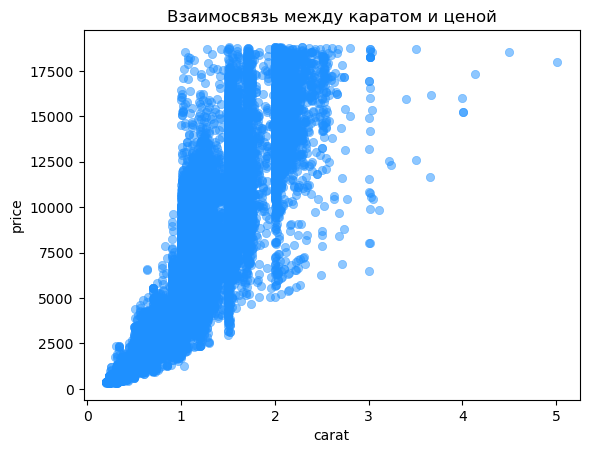

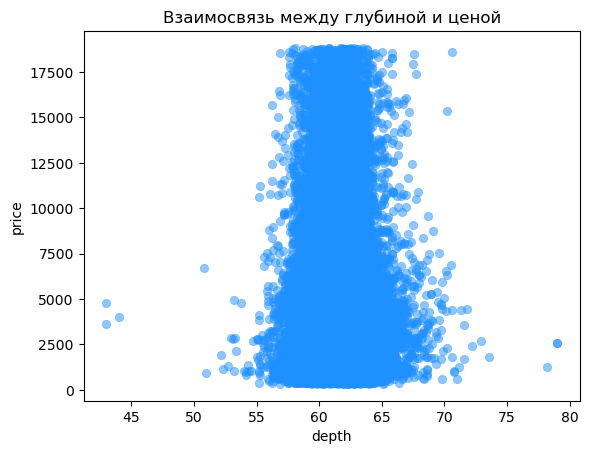

In [10]:
# Взаимосвязь между каратом и ценой
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5, edgecolor=None, color='dodgerblue')
plt.title('Взаимосвязь между каратом и ценой')
plt.show()

# Взаимосвязь между глубиной и ценой
sns.scatterplot(x='depth', y='price', data=df, alpha=0.5, edgecolor=None, color='dodgerblue')
plt.title('Взаимосвязь между глубиной и ценой')
plt.show()


1) Взаимосвязь между каратом и ценой:
Чёткая положительная зависимость: с увеличением веса бриллианта его стоимость растет.
Особенно высокие цены наблюдаются у камней более 2 карат, что подтверждается разреженными точками на верхней части графика.
2) Взаимосвязь между глубиной и ценой:
Значения глубины имеют меньшее влияние на цену, судя по более равномерному распределению цен при различных глубинах.
Нет явной зависимости между глубиной бриллианта и его стоимостью, что может указывать на то, что цена определяется иными факторами более сильно, чем глубина огранки.

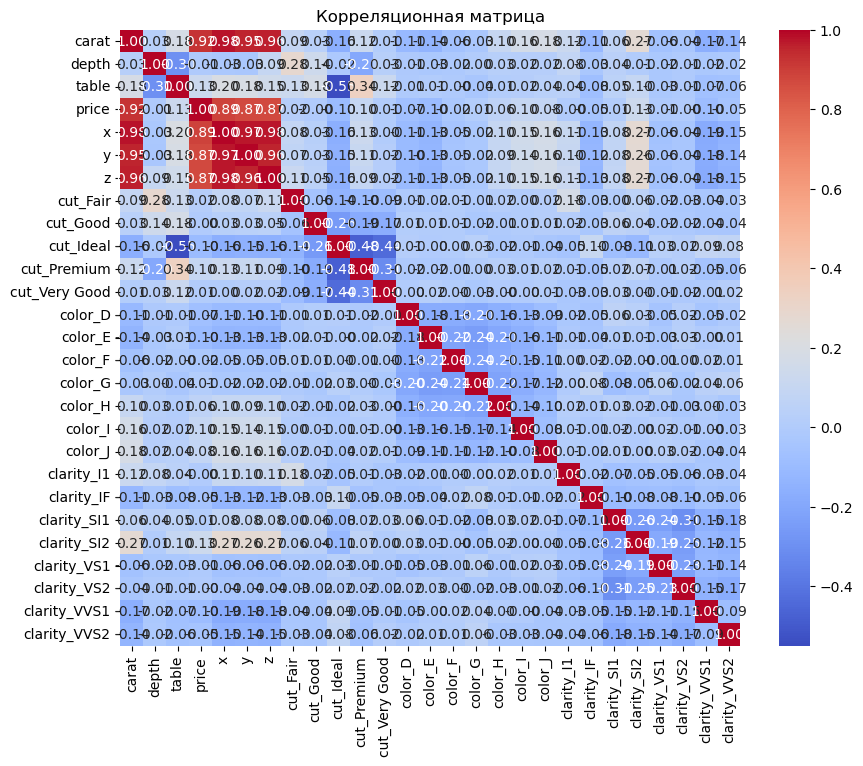

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()


#### Корреляционная матрица, которую мы представили, показывает взаимосвязи между различными характеристиками бриллиантов

1) Carat (карат):
Сильно положительно коррелирует с размерами x, y, z и ценой. Это ожидаемо, так как чем больше вес камня, тем больше его размеры и, как правило, цена.
2) Price (цена):
Высокая положительная корреляция с каратом и размерами x, y, z, что подтверждает, что более крупные камни стоят дороже.
Отрицательная корреляция с категориями огранки, особенно с "cut_Ideal", может указывать на то, что идеальная огранка не обязательно самая дорогая, возможно из-за более высокой доступности.
3) Cut, Color, Clarity (Огранка, Цвет, Чистота):
Огранка: "cut_Ideal" имеет положительную связь с ценой и отрицательную со многими другими категориями огранки.
Цвет: более высокие категории цвета (ближе к D) обычно связаны с более высокой ценой.
Чистота: высокие значения чистоты (например, "clarity_IF", "clarity_VVS1") имеют отрицательную корреляцию с ценой, что может указывать на редкость этих высоких категорий и их необязательное влияние на увеличение стоимости.
4) Depth и Table (Глубина и Ширина верхней части):
Не показывают сильной корреляции с ценой, что может означать, что эти размерные характеристики менее значимы для ценообразования по сравнению с весом и размерами камня.


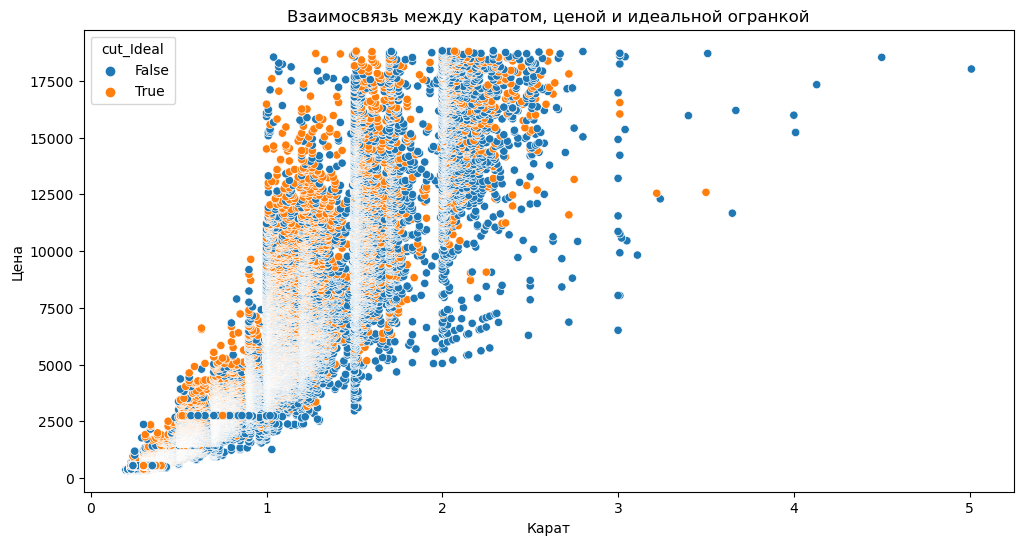

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut_Ideal')  # Пример с использованием дамми переменной
plt.title('Взаимосвязь между каратом, ценой и идеальной огранкой')
plt.xlabel('Карат')
plt.ylabel('Цена')
plt.show()



1) Вес карата и цена: График показывает, что с увеличением веса бриллианта в каратах его цена также увеличивается. Это видно по распределению точек, где большие значения карат сопровождаются более высокими ценами.
2) Влияние огранки на цену: Точки с идеальной огранкой (оранжевый цвет) чаще встречаются в верхних участках каждого вертикального "кластера", что может свидетельствовать о том, что бриллианты с идеальной огранкой часто оцениваются выше, особенно при одинаковом весе карата. Это предположение нуждается в дальнейшем статистическом анализе для подтверждения.
3) Распределение по каратам: Большинство бриллиантов на рынке имеют вес от 0 до 3 карат, при этом точки становятся реже с увеличением карата свыше 3.

## Гипотеза о влиянии объема на цену:
Формулировка: Бриллианты с большим объемом имеют более высокую цену, даже при одинаковом весе в каратах.
Обоснование: Объем бриллианта может влиять на его визуальное восприятие и редкость, что может делать его более желанным на рынке, особенно если камень обладает выдающимися оптическими свойствами.
## Гипотеза о взаимосвязи премиального качества и цены:
Формулировка: Бриллианты с высоким показателем premium_quality имеют значительно более высокую цену.
Обоснование: Премиальные характеристики, такие как идеальная огранка, высокий уровень чистоты и бесцветность, являются ключевыми факторами, которые обычно ассоциируются с более высокими ценами из-за их редкости и влияния на внешний вид камня.
## Гипотеза о влиянии плотности на оптические свойства:
Формулировка: Бриллианты с более высоким density_index обладают лучшими оптическими свойствами и выше оцениваются на рынке.
Обоснование: Плотность кристаллической решетки может влиять на способность бриллианта преломлять свет, что в свою очередь влияет на его блеск и "огонь". Бриллианты с высокой плотностью могут демонстрировать лучшие световые характеристики.
## Гипотеза о сочетании качеств:
Формулировка: Сочетание высоких показателей по шкалам color и clarity влияет на цену бриллианта больше, чем высокие показатели по отдельности.
Обоснование: Некоторые комбинации характеристик могут быть более желательны для определенных сегментов рынка. Например, бесцветные бриллианты с высокой чистотой могут привлекать более высокую премию, чем камни, выдающиеся только по одному из этих показателей.

In [13]:
# Пример задания весов для расчета индекса качества
weights_carat = 0.5  # вес для карата
weights_cut = {'cut_Fair': 1, 'cut_Good': 2, 'cut_Very Good': 3, 'cut_Premium': 4, 'cut_Ideal': 5}
weights_clarity = {'clarity_I1': 1, 'clarity_SI2': 2, 'clarity_SI1': 3, 'clarity_VS2': 4, 'clarity_VS1': 5, 'clarity_VVS2': 6, 'clarity_VVS1': 7, 'clarity_IF': 8}

# Применение весов к дамми-переменным для создания индекса качества
df['quality_index'] = df['carat'] * weights_carat
for key, value in weights_cut.items():
    df['quality_index'] += df[key] * value * 0.2  # Присваиваем меньший вес огранке
for key, value in weights_clarity.items():
    df['quality_index'] += df[key] * value * 0.1  # Присваиваем еще меньший вес чистоте

print(df[['quality_index']].head())


   quality_index
0          1.315
1          1.205
2          1.015
3          1.345
4          0.755


Этот код создаст новую переменную 'quality_index', которая будет представлять собой взвешенное среднее значений карата, огранки, цвета и чистоты, где каждая из категорий будет учтена с соответствующими весами. Этот индекс позволит провести дальнейший анализ качества бриллиантов в зависимости от их физических и визуальных характеристик.

#### Создание переменных
1) Объем бриллианта (Volume): Используя размеры x, y, z, можно вычислить приблизительный объем бриллианта. Объем может быть интересным признаком, поскольку он напрямую не указан, но может сильно влиять на цену, особенно в сочетании с качеством огранки.
2) Соотношение длины и ширины (Aspect Ratio): Этот признак может быть полезен для определения формы бриллианта. Некоторые формы могут быть более желательными или редкими и, следовательно, могут влиять на цену.
3) Плотность цвета и чистоты (Color Clarity Density): Комбинированный весовой признак, объединяющий веса цвета и чистоты, может дать представление о том, как сочетание этих двух факторов влияет на цену.

In [15]:
df['volume'] = df['x'] * df['y'] * df['z']
# Переменная, оценивающая премиум-качество бриллианта на основе огранки, цвета и чистоты
df['premium_quality'] = ((df['cut_Ideal'] + 
                          df[['clarity_IF', 'clarity_VVS1', 'clarity_VVS2']].max(axis=1) + 
                          df[['color_D', 'color_E']].max(axis=1)) / 3)

# Индекс плотности, показывающий отношение карата к объему
df['density_index'] = df['carat'] / df['volume']

# Проверка результатов
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,quality_index,volume,premium_quality,density_index
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,True,False,False,False,False,1.315,38.202030,0.333333,0.006021
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,True,False,False,False,False,False,1.205,34.505856,0.333333,0.006086
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,True,False,False,False,1.015,38.076885,0.333333,0.006040
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,False,False,False,True,False,False,1.345,46.724580,0.000000,0.006207
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,False,0.755,51.917250,0.000000,0.005971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,True,False,False,False,False,False,1.660,115.920000,0.333333,0.006211
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,True,False,False,False,False,False,1.060,118.110175,0.333333,0.006096
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,True,False,False,False,False,False,1.250,114.449728,0.333333,0.006116
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,True,False,False,False,False,1.430,140.766120,0.000000,0.006109


# Гипотезы

При визуализации у вас возникли гипотезы о закономерностях, которые есть в ваших данных. Проверьте эти гипотезы с помощью математической статистики. Итоговый балл зависит от того, насколько интересные находки вы сделаете и насколько корректно вы подберёте для проверки критерий/процедуру. Это может быть что угодно от непараметрических тестов и z-статистики до бутстрапа и теста отношения правдоподобий.

In [19]:
df.fillna({
    'carat': df['carat'].median(),
    'volume': df['volume'].median(),
    'price': df['price'].median()
}, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53940 non-null  float32
 1   depth            53940 non-null  float64
 2   table            53940 non-null  float64
 3   price            53940 non-null  int64  
 4   x                53940 non-null  float64
 5   y                53940 non-null  float64
 6   z                53940 non-null  float64
 7   cut_Fair         53940 non-null  bool   
 8   cut_Good         53940 non-null  bool   
 9   cut_Ideal        53940 non-null  bool   
 10  cut_Premium      53940 non-null  bool   
 11  cut_Very Good    53940 non-null  bool   
 12  color_D          53940 non-null  bool   
 13  color_E          53940 non-null  bool   
 14  color_F          53940 non-null  bool   
 15  color_G          53940 non-null  bool   
 16  color_H          53940 non-null  bool   
 17  color_I     

In [29]:
# Преобразование булевых значений к int
df['cut_Ideal'] = df['cut_Ideal'].astype(int)
df['color_E'] = df['color_E'].astype(int)
df['clarity_VVS1'] = df['clarity_VVS1'].astype(int)

# Добавление константы для регрессионной модели
X = df[['carat', 'volume', 'cut_Ideal', 'color_E', 'clarity_VVS1']]
X = sm.add_constant(X)

# Зависимая переменная
y = df['price']

# Создание и тренировка модели
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.439e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        03:29:59   Log-Likelihood:            -4.7141e+05
No. Observations:               53940   AIC:                         9.428e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2698.7337     15.757   -171.270   

Результаты явно подтверждают гипотезу о том, что увеличение каратности, объема, наличие идеальной огранки, цвета E и чистоты VVS1 значительно увеличивают цену бриллианта. Это дает четкое представление о том, какие характеристики наиболее ценятся на рынке бриллиантов.

In [30]:
import statsmodels.api as sm

# Предварительно проверим, что данные в 'premium_quality' и 'price' в числовом формате и нет NaN значений
df['premium_quality'] = pd.to_numeric(df['premium_quality'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['premium_quality', 'price'], inplace=True)  # Удаление строк с NaN значениями

# Добавление константы для регрессионной модели
X = sm.add_constant(df['premium_quality'])

# Зависимая переменная
y = df['price']

# Создание и тренировка модели
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1535.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        03:34:55   Log-Likelihood:            -5.2302e+05
No. Observations:               53940   AIC:                         1.046e+06
Df Residuals:                   53938   BIC:                         1.046e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4824.8713     28.380    1